In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [10]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [9]:
df['Age'].fillna(df['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [8]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [16]:
X = df[['Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-214145096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


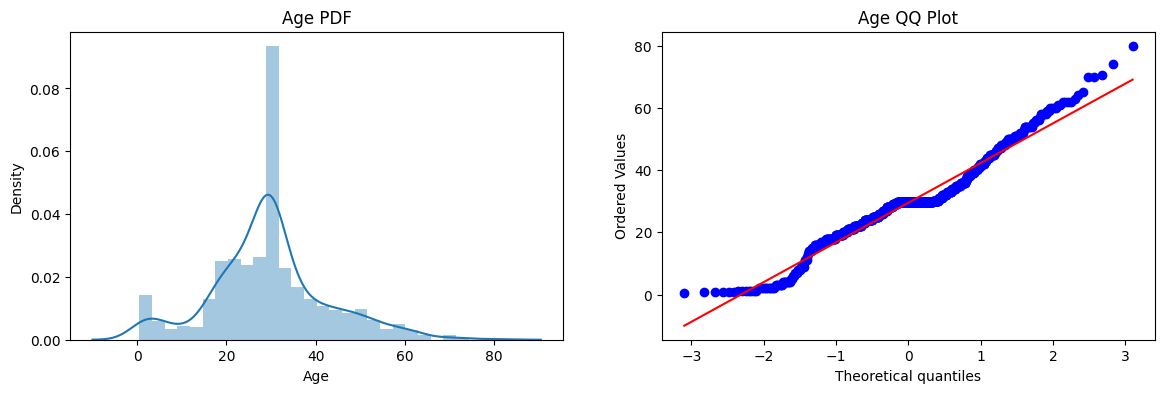

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()


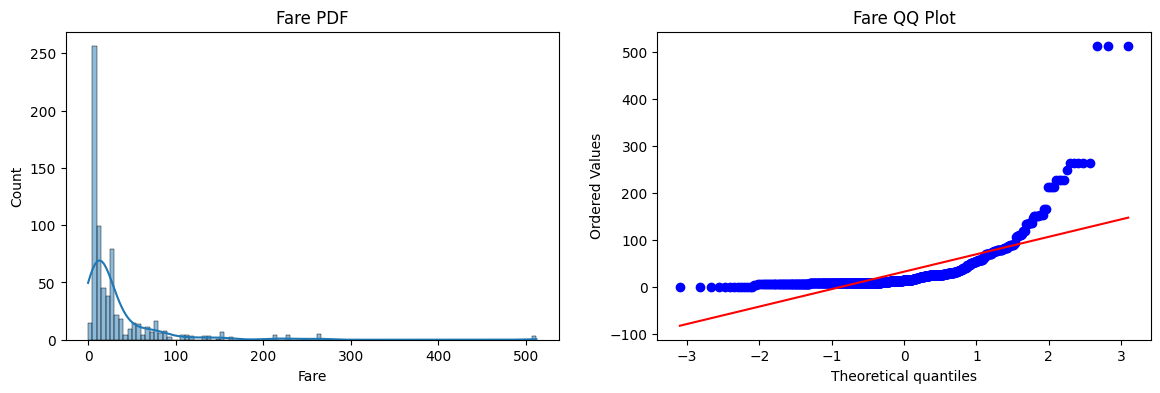

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred2))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


In [21]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)


In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [24]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)


print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred2))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [25]:
from sklearn.model_selection import cross_val_score

print("LR", np.mean(cross_val_score(clf,X_train_transformed,y_train,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_train_transformed,y_train,scoring='accuracy',cv=10)))


LR 0.6783646322378717
DT 0.6235719874804382


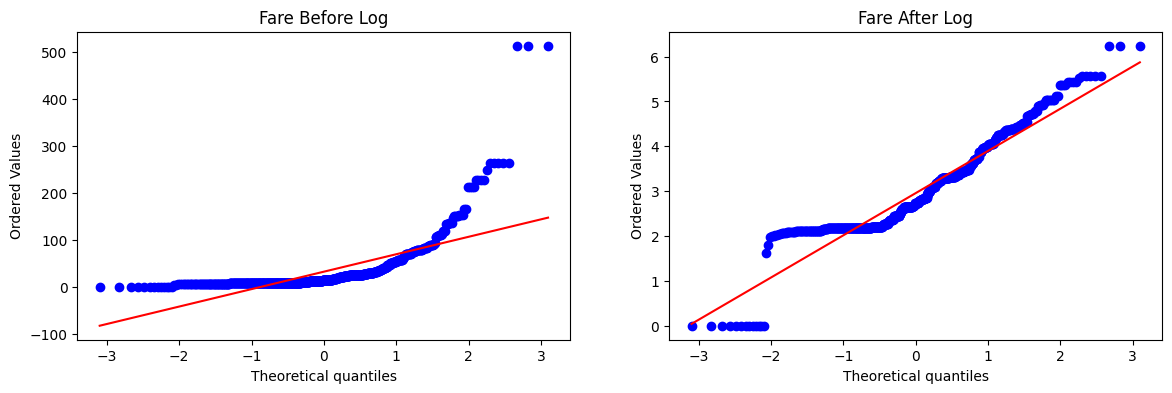

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')
plt.show()


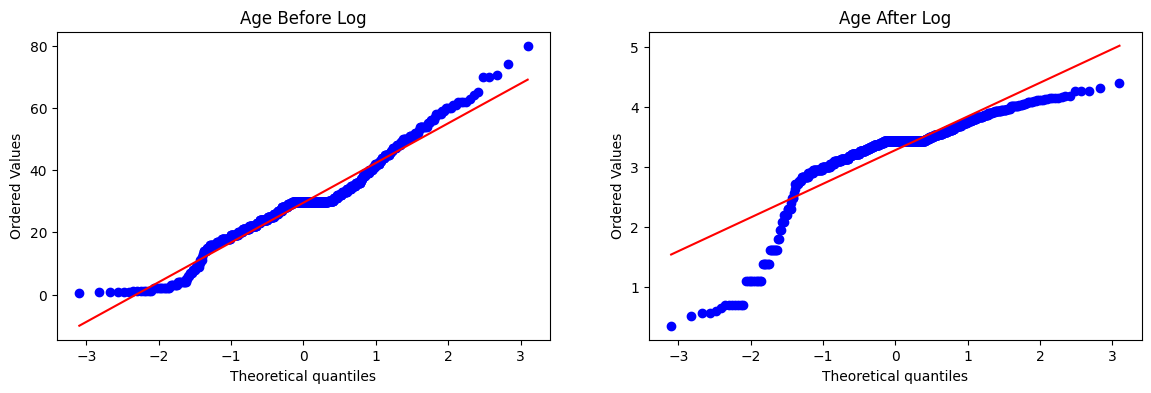

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')
plt.show()


In [28]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed = trf2.transform(X_test)


In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [31]:
print("LR", np.mean(cross_val_score(clf,X_train_transformed,y_train,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_train_transformed,y_train,scoring='accuracy',cv=10)))


LR 0.6572378716744913
DT 0.620774647887324


In [33]:
def apply_transform(transform_func):
    X_copy = X.copy()
    y_copy = y.copy()
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

    trf = ColumnTransformer([
        ('transform_col', FunctionTransformer(transform_func), ['Fare'])
    ], remainder='passthrough')

    X_train_transformed = trf.fit_transform(X_train_split)

    clf = LogisticRegression()
    print("Accuracy", np.mean(cross_val_score(clf, X_train_transformed, y_train_split, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    stats.probplot(X_train_split['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(1, 2, 2)
    stats.probplot(X_train_transformed[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')
    plt.show()
